In [1]:
import yfinance as yf
import pandas as pd

# Download stock data for multiple tickers with dividends and splits
df = yf.download(["AAPL", "MSFT"], start="2024-01-01", end="2025-12-31", actions=True)

print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed

Price            Close             Dividends             High              \
Ticker            AAPL        MSFT      AAPL MSFT        AAPL        MSFT   
Date                                                                        
2024-01-02  184.290421  366.707367       0.0  0.0  187.070068  371.680909   
2024-01-03  182.910538  366.440430       0.0  0.0  184.528693  369.070578   
2024-01-04  180.587540  363.810242       0.0  0.0  181.758954  368.912329   
2024-01-05  179.862823  363.622437       0.0  0.0  181.431339  367.884059   
2024-01-08  184.210983  370.484497       0.0  0.0  184.250701  370.988783   

Price              Low                    Open             Stock Splits       \
Ticker            AAPL        MSFT        AAPL        MSFT         AAPL MSFT   
Date                                                                           
2024-01-02  182.553143  362.653379  185.789438  369.663798          0.0  0.0   
2024-01-03  182.096492  364.373891  182.880757  364.868279     

In [3]:
import talib

# Calculate indicators for each ticker
for ticker in df['Close'].columns:
    df['RSI', ticker] = talib.RSI(df['Close'][ticker], timeperiod=14)
    df['MA_50', ticker] = talib.SMA(df['Close'][ticker], timeperiod=50)
    df['MA_200', ticker] = talib.SMA(df['Close'][ticker], timeperiod=200)
    df['MACD', ticker], df['MACD_signal', ticker], df['MACD_hist', ticker] = talib.MACD(
        df['Close'][ticker], fastperiod=12, slowperiod=26, signalperiod=9
    )

In [4]:
import yfinance as yf

# Fetch data for AAPL
aapl = yf.Ticker("AAPL")
price_data = aapl.history(start="2022-01-01", end="2023-12-31")
print(price_data.head())

# Calculate daily returns
returns = price_data['Close'].pct_change()
print("Daily returns:\n", returns.tail())

                                 Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  174.542932  179.499589  174.425155  178.645660   
2022-01-04 00:00:00-05:00  179.254190  179.558457  175.809061  176.378342   
2022-01-05 00:00:00-05:00  176.290017  176.839663  171.411883  171.686707   
2022-01-06 00:00:00-05:00  169.507752  172.059699  168.467348  168.820694   
2022-01-07 00:00:00-05:00  169.694257  170.921151  167.868637  168.987564   

                              Volume  Dividends  Stock Splits  
Date                                                           
2022-01-03 00:00:00-05:00  104487900        0.0           0.0  
2022-01-04 00:00:00-05:00   99310400        0.0           0.0  
2022-01-05 00:00:00-05:00   94537600        0.0           0.0  
2022-01-06 00:00:00-05:00   96904000        0.0           0.0  
2022-01-07 00:00:00-05:00   86709100        0.0           0.0  
Daily return

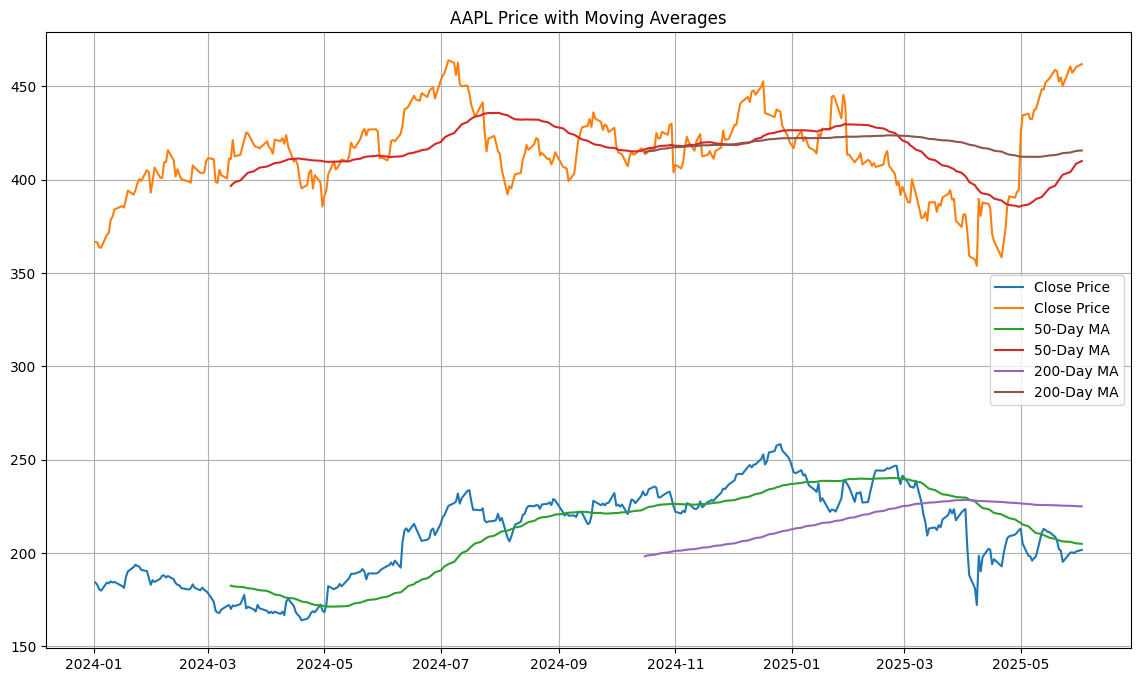

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot closing price and moving averages
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_50'], label='50-Day MA')
plt.plot(df['MA_200'], label='200-Day MA')
plt.title("AAPL Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()


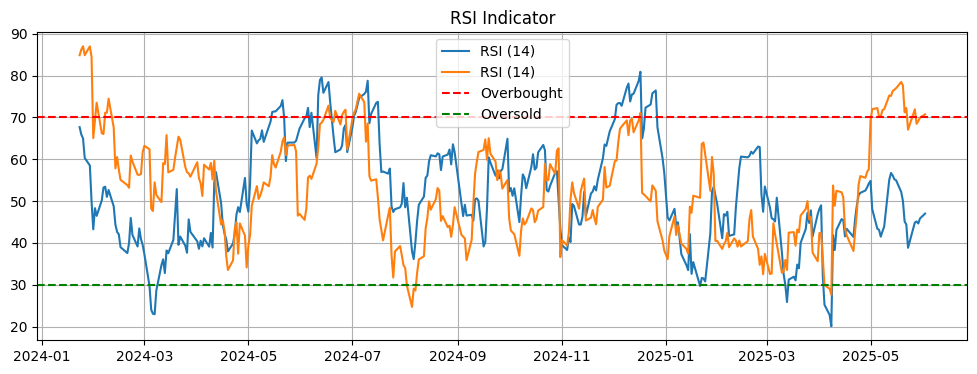

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(df['RSI'], label='RSI (14)')
plt.axhline(70, color='r', linestyle='--', label='Overbought')
plt.axhline(30, color='g', linestyle='--', label='Oversold')
plt.title("RSI Indicator")
plt.legend()
plt.grid()
plt.show()


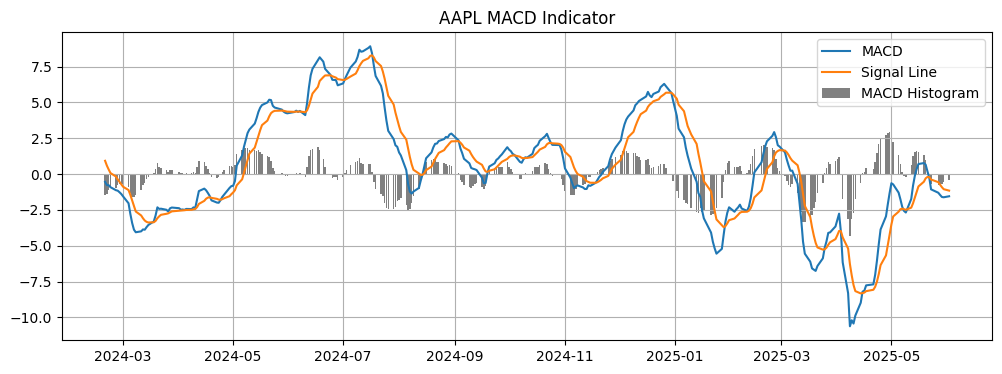

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(df['MACD', 'AAPL'], label='MACD')
plt.plot(df['MACD_signal', 'AAPL'], label='Signal Line')
plt.bar(df.index, df['MACD_hist', 'AAPL'], label='MACD Histogram', color='gray')
plt.title("AAPL MACD Indicator")
plt.legend()
plt.grid()
plt.show()
